In [1]:
#
from datetime import datetime
#target_code = '033340'
#date_from = '1995-5-2'
date_from  = '2015-1-1'
today=  datetime.now().strftime('%Y-%m-%d')
today

'2021-03-10'

In [2]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [3]:
# 쌍방울 코드 검색하기
target_name = "데브시스터즈"
df = pd.read_csv("marcap/data/marcap-2021.csv.gz")
target_code = df[df["Name"] == target_name]["Code"].iloc[0]
target_code

'194480'

In [4]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 

pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = marcap_data(date_from, today, target_code)

In [6]:
latest_stocks = df.iloc[-1]['Stocks']
latest_stocks

11224370.0

In [7]:
df['Adj Close'] = df['Close'] / latest_stocks * df['Stocks']

<AxesSubplot:xlabel='Date'>

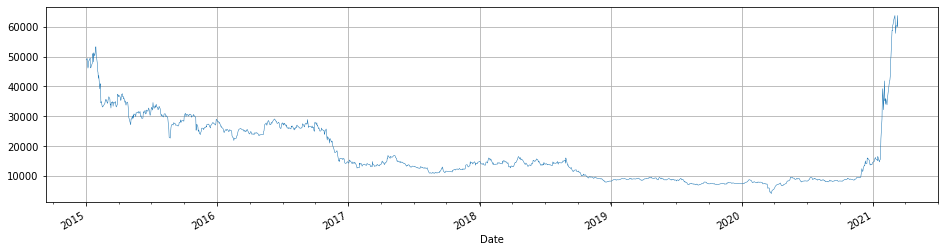

In [8]:
df['Adj Close'].plot()

In [9]:
df['Adj Close'].iloc[-1]

59999.99999999999

In [10]:
df.iloc[-1]

Code                   194480
Name                   데브시스터즈
Market                 KOSDAQ
Dept                    벤처기업부
Close                 60000.0
ChangeCode                  2
Changes               -3800.0
ChagesRatio               NaN
Open                  62800.0
High                  63800.0
Low                   59000.0
Volume               159485.0
Amount           9699467300.0
Marcap         673462200000.0
Stocks             11224370.0
MarketId                  KSQ
Rank                      329
ChangesRatio            -5.96
Adj Close             60000.0
Name: 2021-03-10 00:00:00, dtype: object

In [11]:
import scipy.stats

In [12]:
c_min = df['Adj Close'].min()
c_max = df['Adj Close'].max()
c_mean = df['Adj Close'].mean()
c_std = df['Adj Close'].std()

c_current = df['Adj Close'].iloc[-1]

c_norm = scipy.stats.norm(c_mean, c_std)
print(c_min, c_max, c_mean, c_current, c_norm.cdf(c_current))

4002.8548328324887 63800.0 17283.514925488962 59999.99999999999 0.9999792393505981


In [13]:
c_mean/c_current

0.2880585820914827

<AxesSubplot:xlabel='Date'>

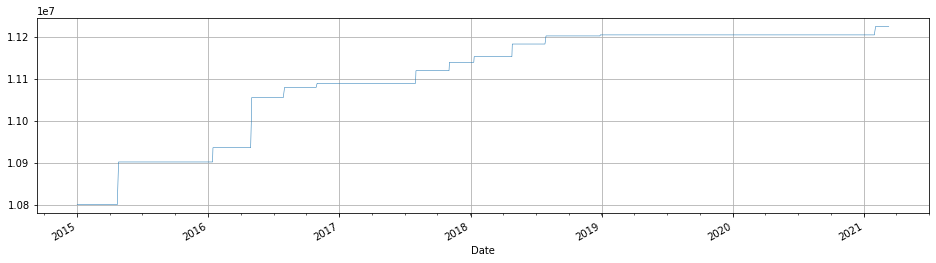

In [14]:
df['Stocks'].plot()